# PySpark - Structure Streaming with PySpark

## Introduction

This project aims to explore the workings of Structured Streaming with PySpark. As there are an abundance of machine generated data from things like IoT, sensors, devices and beacons. Gaining an insight from these data is becoming more important and requires a quicker response. Streaming such analytics can therefore be a huge differentiator and can be an advantage in business. 

This project will be combining batch and real time processing to develop continuous applications. The data can be analysed by utilising Spark SQL in batch or in real time, machine learning models will be trained (with MLlib) and followed by scoring these models using Spark Streaming. 

Apache Spark has been widely adopted due to its ability to unify the disparate data processing paradigms such as Machine learning, SQL and streaming. Companies that uses this are Netflix, Uber, Pinterest etc.

The key abstraction in Structure Streaming with PySpark is a discretised stream (DStream) where it represents a stream of data that is divided up into smaller batches. As these are built on Spark's RDDs, it allows for Spark Streaming to integrate into any other of Spark's components seamlessly such as MLlib or SQL. This unification is one of the key reason of its rapid adaptation in business. It allows developers to use a single framework to perform all processing needs. In short, developers and system administrators can just focus more of their energy on developing smarter solutions/applications.

More information:
- https://www.datanami.com/2015/11/30/spark-streaming-what-is-it-and-whos-using-it/
- https://www.datanami.com/2015/10/05/how-uber-uses-spark-and-hadoop-to-optimize-customer-experience/
- https://databricks.com/session/spark-and-spark-streaming-at-netflix

## Running Spark Streaming:

Majority of this project will be ran within the System Terminals. This notebook will be used to show the screenshots of the events and its description, like how things are working.

## Breakdown of this Notebook

- Develope an understanding on DStreams
- Develope an understanding on Global Aggregations
- Overview of Structured Streaming
- Continuous Aggregations with Structured Streaming

## 1 PySpark Machine Configuration:

Here it only uses four processing cores from the CPU, and it set up by the following code.

In [1]:
%%configure
{
    "executorCores" : 4
}

In [2]:
from pyspark.sql.types import *

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,None,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 2 Setup the Correct Directory:

In [3]:
import os

# Change the Path:
path = '++++your working directory here++++/Datasets/'
os.chdir(path)
folder_pathway = os.getcwd()

# print(folder_pathway)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 3 What is Spark Streaming?:

To allow for real time processing, Spark's structured streaming is built on DataFrames, this also meaans that it allows for processes like streaming, machine learning and SQL. These are optimised with Spark SQL Engine Catalyst Optimiser (which also receives regular updates). 

To better understand Spark Streaming, the fundamentals of its predecessor should be explored. 

### The diagram below shows the data flow of a Spark driver, workers, streaming sources and streaming targets (storage) in a Spark Streaming application:

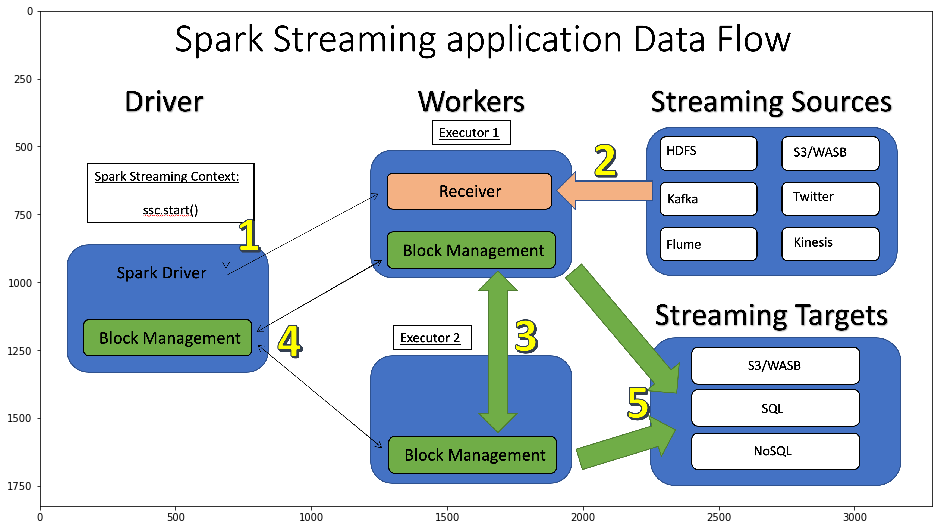

In [4]:
%%local

# Import the required library and set to use ggplot:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder_pathway = os.getcwd()
image_path = folder_pathway + "/Description Images/"

# plot the image
fig, ax1 = plt.subplots(figsize=(16,10))
image = mpimg.imread(image_path + 'Spark Streaming application Data Flow.png')
plt.imshow(image);

# print('Image source -> ')

### Description of what is happening:

1. This step starts the Spark Streaming Context (ssc.start() ) where the driver will execute the running taasks on the executors also known as Spark workers.
2. With the code already defined within the driver from the Spark Streaming Context, the Receiver on executor 1 will receive a data stream from the Streaming Sources (such as HDFS, Twitter etc., or it is also possible to create a custom receiver). The receiver will also divide up the incoming data stream into blocks and retains it as blocks in the memory.
3. As with working with Spark, these data blocks are replicated onto another executor such as executor 2, for the purposes of high availability.
4. The block manager in the master node (driver) will have this block ID inforamtion being transmitted onto it. This ensures that each block of the data in the memory is correctly tracked and accounted for.
5. The Spark Streaming Context will have every batch interval configured (such as every 1 second) where the driver will launch Spark tasks to process each of these blocks. Lastly, these blocks are persisted to target data stores and these can be cloud storage (S3/WASB), relational data stores (like MySQL, PostgreSQL etc) or No SQL stores.

## 4 DStreams:

Discretised Streams (DStreams) is the fundamental streaming building block and is built on top of RDDs. __It represents a stream of data that is divided into smaller chunks__.

This section will cover DStreams and performing global aggregations by stateful calculations on it. This is followed by simplifying the streaming application utilising structured streaming and simultaneously gaining performance optimisations. 

### The diagram below shows that these data chunks are in micro-batches of milliseconds to seconds:

This example shows how the lines of DStream is broken down into micro-batches of seconds. Each of the square here represents a micro-batch of each events that has occured within the individual 1 second window.

Image source -> 


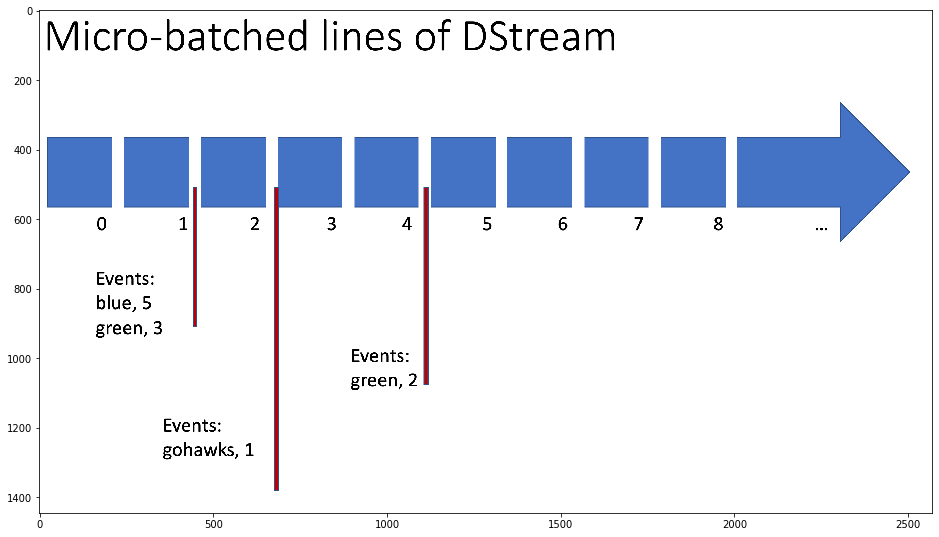

In [5]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'Microbatch lines of DStream.png')
plt.imshow(image);

print('Image source -> ')

### Description of what is happening:

1. First interval, at 1 second: there are 5 occurrences of "blue" event and 3 occurrences of "green" event.
2. Second interval, at the 2nd second: there is a single occurrence of "gohawks".
3. Fourth interval, at the 4th second: there are 2 occurrences of "green" event.

## 4.1 Executing in Bash terminal:

The above events will be created and executed in a console application (Bash terminal). This section will require two terminals to be opened.

Terminal 1: To transmit an event. \
Terminal 2: to receive these events.

### Proceed to configure the 'log4j" file before continuing. See section 4.1.3.
### Before Running -> See Running errors with Spark-Submit in Section 4.1.4.


## 4.1.1 For Terminal 1 -> Netcat Window

Use Netcat (nc) to send the events of blue, green and gohawks. To begin, the following commands are used. This will direct the events to port 9999 and that the Spark Streaming job will be detected.

Image source -> 


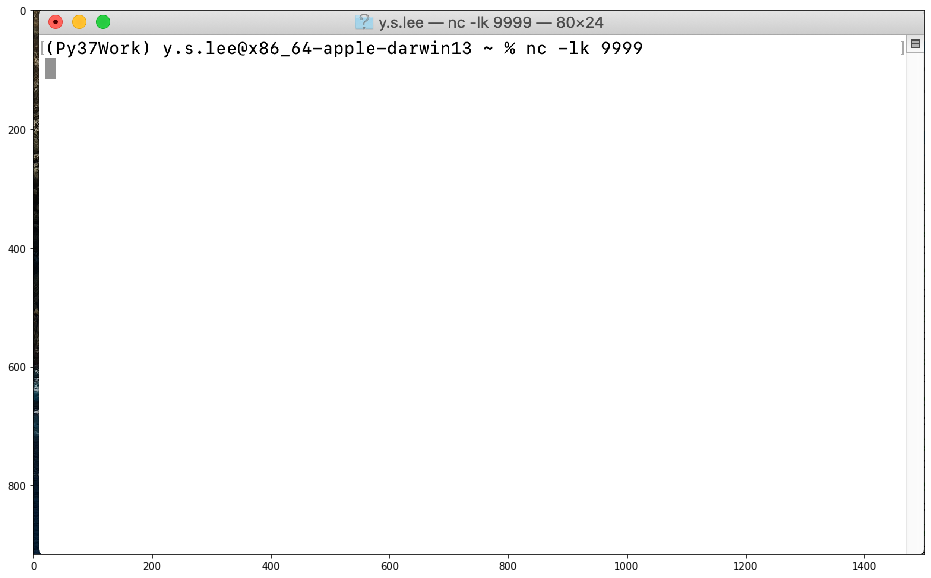

In [6]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'data chunks in micro batches_1.png')
plt.imshow(image);

print('Image source -> ')

Next, will be to type in the events that are desired, where it can be seen in the following diagram.

Image source -> 


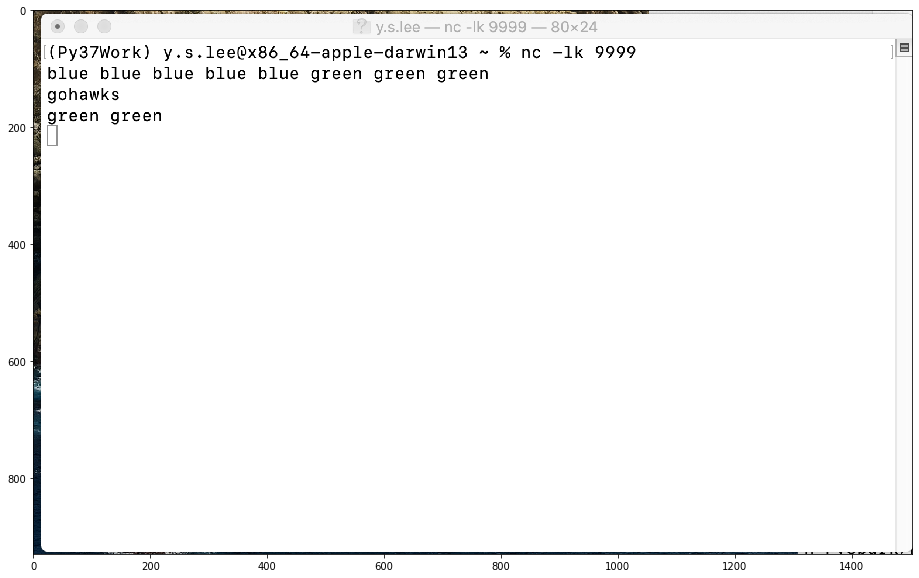

In [7]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'data chunks in micro batches_2.png')
plt.imshow(image);

print('Image source -> ')

## 4.1.2 For Terminal 2 -> Spark Streaming Window

Create a PySpark Streaming application that counts the number of words (events above). The code is constructed in a " .py " file which can be created in PyCharm or other IDE and call it: streaming_word_count.py

The following describes the inner workings:
- First, create the Spark Context to only use 2 CPU threads for processing. By setting local[2].
- Use the "ssc.socketTextStream" to connect to localhost:9999 for the stream of input lines.
- As the Streaming Context is set up for 1 second intervals, next is to read a single line of inputs and also split up the total words into individual words. Done with the ".split()" function.
- Using two Python lambda functions to do two things, where the first is to ".map()" counting the occurrnces of words within each of the 1 second batch. The second one is to ".reduceByKey()", where the word is the key and its total count is the value.
- Start the Spark Streaming context application with "ssc.start()" command.
- Once computations are completed, the streaming application will be set to "ssc.awaitTermination()" and can be terminated by using (Ctrl+C) command.

Here, the file is saved into the same working directory folder. (This project Folder)

Image source -> 


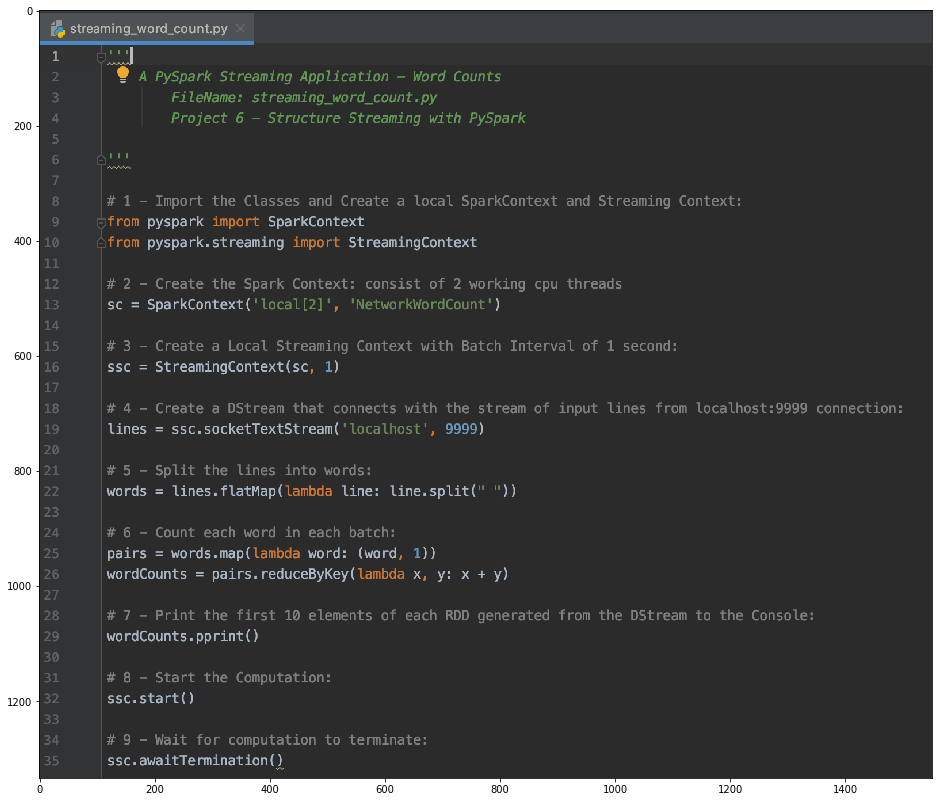

In [8]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 15))
image = mpimg.imread(image_path + 'streaming_word_count_pyFile.png')
plt.imshow(image);

print('Image source -> ')

## 4.1.3 Removing Unwanted Messages from PySpark Console:

The PySpark console may need to be reconfigured as natively, there may be a lot of messages that are output into the console. This will make it hard to read. To simplify it would require a modified "log4j.properties" file within the $SPARK_HOME/conf folder.

To do this:
1. Navigate to the $SPARK_HOME/conf folder. In terminal, type in -> cd to SPARK DIRECTORY
2. By Default, a "log4j.properties.template" file can be found. Copy this file with the same name and then remove the ".template" behind it. In terminal, type in -> cp log4j.properties.template log4j.properties
3. Using an Editor (sublime, vi etc.) to edit the file. Where in line 19, change "log4j.rootCategory=INFO, console" into "log4j.rootCategory=ERROR, console".
4. If this is done using "nano log4j.properties", to save the file after making the changes can be done by the following commands: first -> (Ctrl+X) second -> (Enter)

This means that only Errors will be directed and shown in the console.

Image source -> 


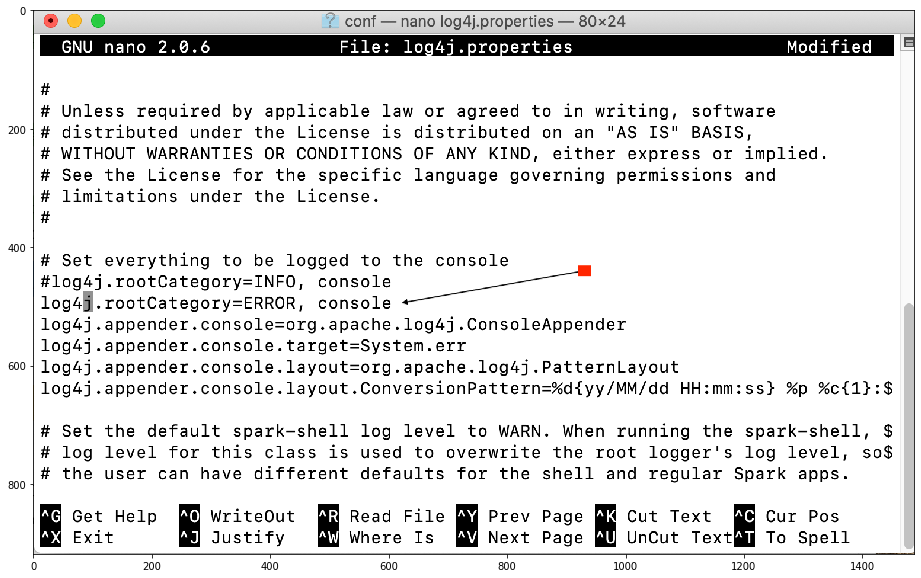

In [9]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'log4j_removeUnwantedMessages.png')
plt.imshow(image);

print('Image source -> ')

## 4.1.4 Putting it all together and Running them:

#### To run Netcat Window and Spark Streaming Window in the following sequence:
1. In TERMINAL 1, Start with NetCat Window -> in terminal, type in: nc -lk 9999
2. In TERMINAL 2, Start the PySpark Streaming App where in terminal, type in: 
    - First navigate to the location of the $SPARK_HOME directory -> cd /opt/spark/bin/
    - This will bring you to your spark directory in the "bin" folder, where the "spark-submit" file is located.
    - Then second to execute the .py file -> spark-submit /your_working_directory/streaming_word_count.py localhost 9999
    - Where "/your_working_directory/" is the working directory where the 'streaming_word_count.py" file is located.
3. It can be seen in Terminal 2 that there are timestamps appearing, where each interval is 1 second.
4. Proceed to type in Terminal 1, where for the 1st second, type in "blue blue blue blue blue green green green". For the 2nd second, type in "gohawks". Wait a second. Finally for the 4th second, type in "green green"

### Running errors with Spark-Submit:

This may require a change in the .zshrc file or .bash_profile file. Where previously this "export PYSPARK_DRIVER_PYTHON=jupyter" was the original setting so that PySpark would run in Jupyter Notebooks, but there is a requirement to change it to "export PYSPARK_DRIVER_PYTHON=python" (set as python) to run "spark-submit"

The above fixes are taken from: 
- MAYBE -> https://stackoverflow.com/questions/46507887/pyspark-error-executing-jupyter-command-while-running-a-file-using-spark-submit
- WORKED -> https://stackoverflow.com/questions/54797832/why-does-spark-submit-fail-with-error-executing-jupyter-command

#### Below shows the Terminal 2 input:

Image source -> 


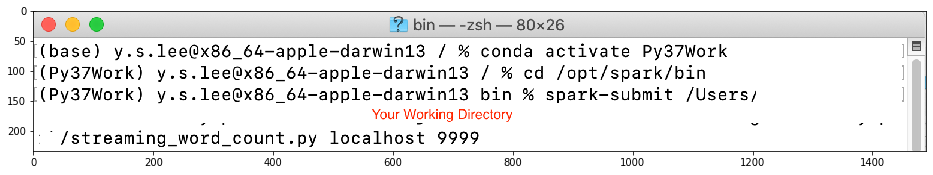

In [10]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'streamingConsoleInput.png')
plt.imshow(image);

print('Image source -> ')

#### Below is a diagram that shows the console Output from the PySpark Streaming application:

Image source -> 


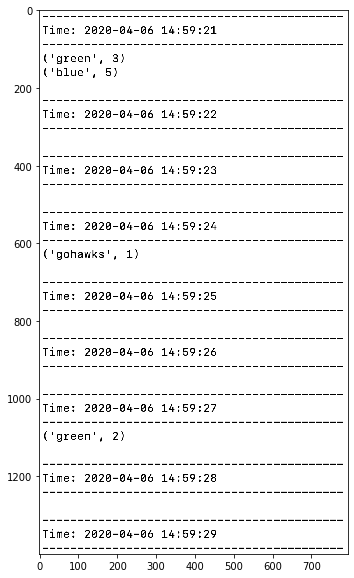

In [11]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'streamingConsoleOutput.png')
plt.imshow(image);

print('Image source -> ')

### To end, simly use (Ctrl+C) to terminate the processes. 

### And Don't forget to change "export PYSPARK_DRIVER_PYTHON=python" back into "export PYSPARK_DRIVER_PYTHON=jupyter" to keep on using Jupyter for PySpark.

## 5 Global Aggregations

In the last section, the DStreams demonstrated the count of events at the points in time (such as 1s, 2s, and 4s time), in this section, it will focus on the __sum of events for some time window__. This can be done with __Global Aggregations__. 

### The diagram below shows Global Aggregations are computed:

Traditionally to perform batch calculations is done by using "groupByKey()" or "GROUP BY" code statements. However, in the case of streaming applications, such a calculation is required to be done within the milliseconds timeframe. This means that the time window needed is too short for traditional calculations. Spark solves this with Spark Streaming global aggregations by using stateful streaming calculation which is very fast. Spark's frameworks allows all the data to be kept in memory and the aggregation is calculated in a small time window.

Image source -> 


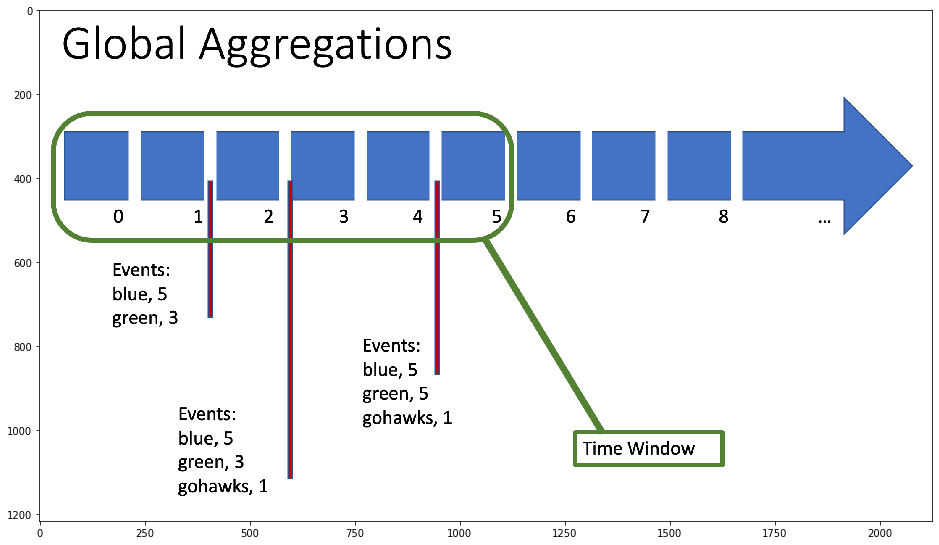

In [12]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'Global Aggregations.png')
plt.imshow(image);

print('Image source -> ')

#### Description of what is happening:
1. Time 1 -> blue 5, green 3
2. Time 2 -> blue 5, green 3, gohawks 1
3. Time 3 -> blue 5, green 5, gohawks 1

## 5.1 Executing in Bash Terminal:

The above events will be created and executed in a console application (Bash terminal). This section will require two terminals to be opened.

Terminal 1: To transmit an event. \
Terminal 2: to receive these events.

### Before Running -> See Running errors with Spark-Submit in Section 5.1.3.

## 5.1.1 For Terminal 1 -> Netcat Window:

Use Netcat (nc) to send the events of blue, green and gohawks. To begin, the following commands are used. This will direct the events to port 9999 and that the Spark Streaming job will be detected.

Image source -> 


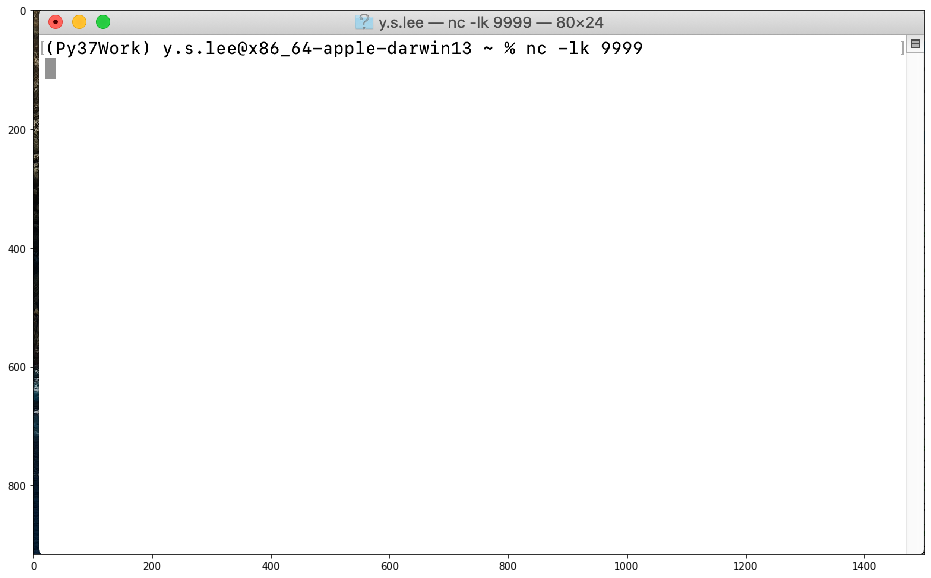

In [13]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'Global Aggregations_Netcat1.png')
plt.imshow(image);

print('Image source -> ')

Next, will be to type in the events that are desired, where it can be seen in the following diagram.

Image source -> 


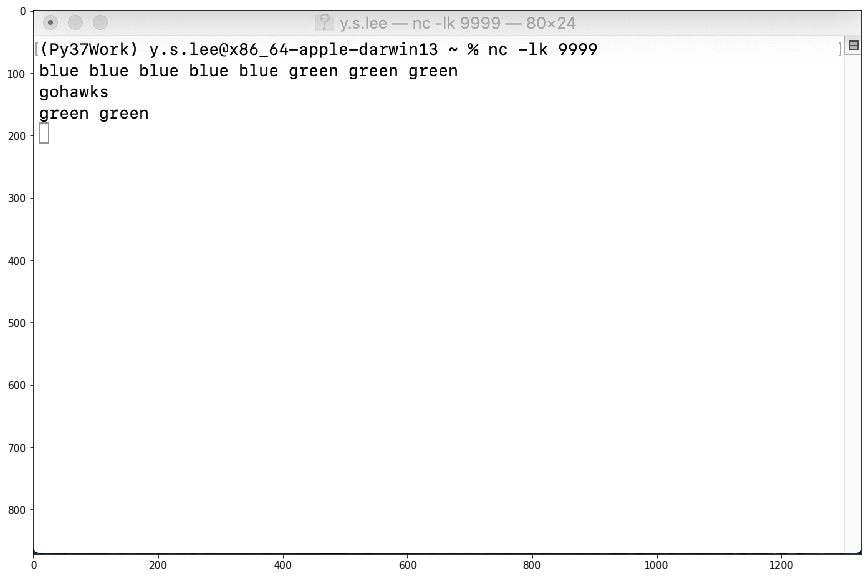

In [14]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'Global Aggregations_Netcat2.png')
plt.imshow(image);

print('Image source -> ')

## 5.1.2 For Terminal 2 -> Spark Streaming Window

Create a PySpark Streaming application that aggregates the number of words (events above). The code is constructed in a " .py " file which can be created in PyCharm or other IDE and call it: stateful_streaming_word_count.py

The following describes the inner workings:
- First, create the Spark Context to only use 2 CPU threads for processing. By setting local[2].
- Create a checkpoint for the Local Streaming Context.
- Define a function (called updateFunc) to perform the aggregating task of the previous value with the current aggregated value.
- Use the "ssc.socketTextStream" to connect to localhost:9999 for the stream of input lines.
- Next is to process each of the input lines to produce a current running count (aggregation) of the events. This is done by splitting the  total words into individual words (Done with the ".split()" function), count each of the word in each batch and finally apply the above user defined function (updateFunc) with the .updateStateByKey().
- Start the Spark Streaming context application with "ssc.start()" command.
- Once computations are completed, the streaming application will be set to "ssc.awaitTermination()" and can be terminated by using (Ctrl+C) command.

Here, the file is saved into the same working directory folder. (This project Folder)

#### NOTE: The difference between the previous streaming application and the (current) stateful streaming application, is that it calculates the running counts with the current aggregation with the .updateStateByKey(). This will allow the Spark Streaming to maintain and keep the state of the current aggregation within the context of the previously defined updateFunc. 

For more information on ".updateStateByKey()":
- https://databricks.gitbooks.io/databricks-spark-reference-applications/content/logs_analyzer/chapter1/total.html

Image source -> 


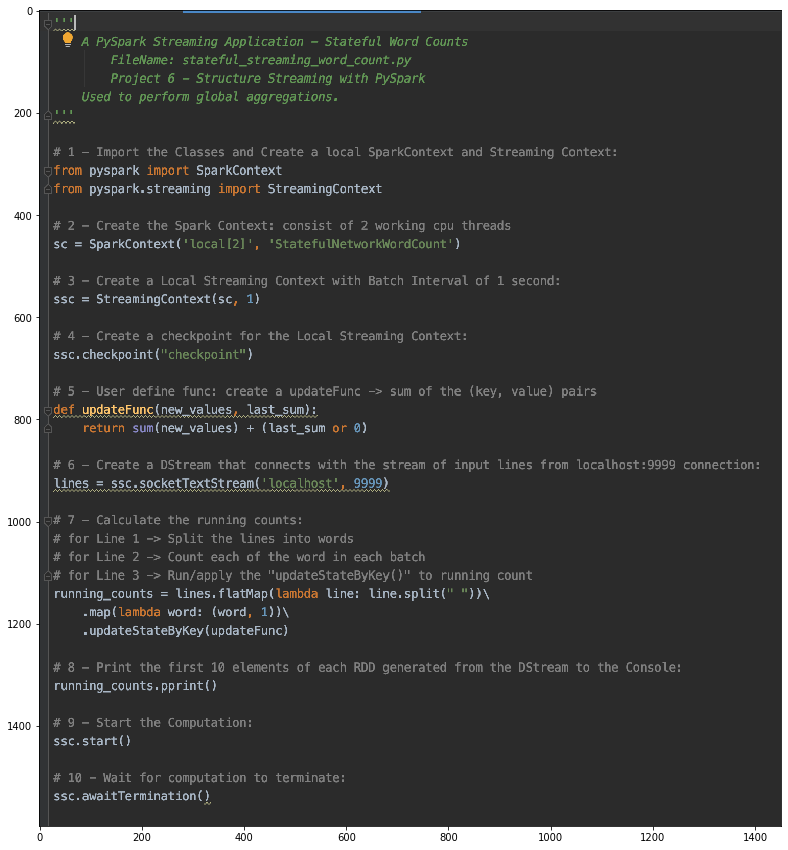

In [15]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 15))
image = mpimg.imread(image_path + 'stateful_streaming_word_count_pyFile.png')
plt.imshow(image);

print('Image source -> ')

## 5.1.3 Putting all together:

#### To run Netcat Window and Spark Streaming Window in the following sequence:
1. In TERMINAL 1, Start with NetCat Window -> in terminal, type in: nc -lk 9999
2. In TERMINAL 2, Start the PySpark Streaming App where in terminal, type in: 
    - First navigate to the location of the $SPARK_HOME directory -> cd /opt/spark/bin/
    - This will bring you to your spark directory in the "bin" folder, where the "spark-submit" file is located.
    - Then second to execute the .py file -> spark-submit /your_working_directory/stateful_streaming_word_count.py localhost 9999
    - Where "/your_working_directory/" is the working directory where the 'stateful_streaming_word_count.py" file is located.
3. It can be seen in Terminal 2 that there are timestamps appearing, where each interval is 1 second.
4. Proceed to type in Terminal 1, where for the 1st second, type in "blue blue blue blue blue green green green". For the 2nd second, type in "gohawks". Wait a second. Finally for the 4th second, type in "green green"

### Running errors with Spark-Submit:

This may require a change in the .zshrc file or .bash_profile file. Where previously this "export PYSPARK_DRIVER_PYTHON=jupyter" was the original setting so that PySpark would run in Jupyter Notebooks, but there is a requirement to change it to "export PYSPARK_DRIVER_PYTHON=python" (set as python) to run "spark-submit".

The above fixes are taken from: 
- MAYBE -> https://stackoverflow.com/questions/46507887/pyspark-error-executing-jupyter-command-while-running-a-file-using-spark-submit
- WORKED -> https://stackoverflow.com/questions/54797832/why-does-spark-submit-fail-with-error-executing-jupyter-command

#### Below shows the Terminal 2 input:

Image source -> 


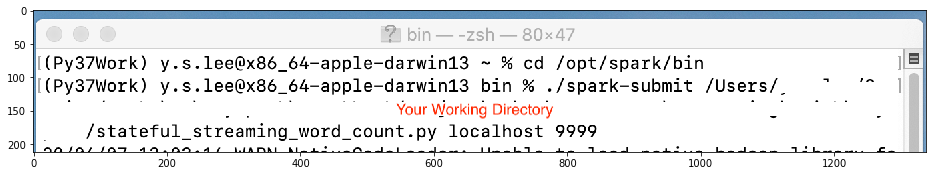

In [16]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'stateful_streamingConsoleInput.png')
plt.imshow(image);

print('Image source -> ')

#### Below is a diagram that shows the console Output from the PySpark Streaming application:

Image source -> 


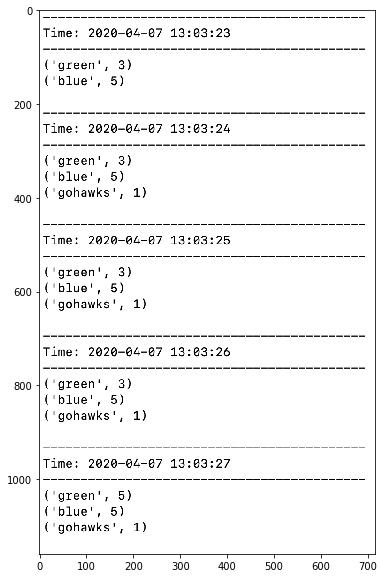

In [17]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'stateful_streamingConsoleOutput.png')
plt.imshow(image);

print('Image source -> ')

### To end, simly use (Ctrl+C) to terminate the processes. 

### And Don't forget to change "export PYSPARK_DRIVER_PYTHON=python" back into "export PYSPARK_DRIVER_PYTHON=jupyter" to keep on using Jupyter for PySpark.

## 6 Structured Streaming:

### Overview of Structured Streaming:

Structured Streaming is a scalable and fault-tolerant stream processing engine that is built on the Spark SQL engine. The streaming computations can be expressed in the same way ass batch computation on staatic data. Note that the engine (Spark SQL engine) it was built on, will deal with running it incrementally and continuously, and updates the final result as streaming data continues to arrive. 

It is possible to utilise the DataFrame/Dataset API from different languages such as Scala, Python, Java and R to express streaming aggregations, event-time windows, stream-to-batch joins a and so on. These computations are executed on the same optimised engine (Spark SQL engine). The system also ensures end-to-tend exactly-once fault-tolerance guarantess by using checkpointing and Write-Ahead Logs.

Source: https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html

For more information:
- https://databricks.com/blog/2016/07/28/structured-streaming-in-apache-spark.html
- https://databricks.com/blog/2016/07/28/continuous-applications-evolving-streaming-in-apache-spark-2-0.html
- https://blog.knoldus.com/understanding-sparks-logical-and-physical-plan-in-laymans-term/
- https://medium.com/@kashifmin/spark-sql-whats-happening-under-the-hood-c703d7f5acf5
- https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html
- https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html

## 6.1 Structured Streaming: Catalyst in Spark SQL

The execution of Spark SQL and DataFrame queries can be subject to 3 parts that are building a __logical plan__, selecting the best __physical plan__ that is baed on its cost optimiser, and then proceed to __code generation__ through the Spark SQL Engine Catalyst Optimiser. 

### The following diagram shows these components:

Image source -> 


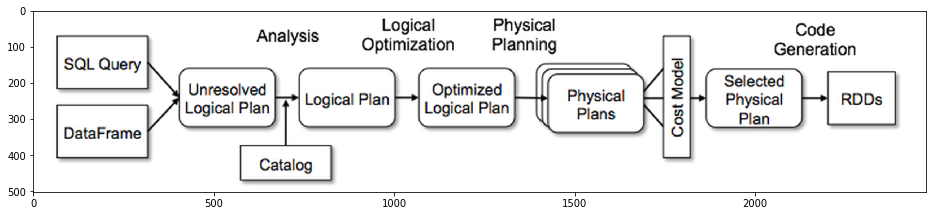

In [18]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'Catalyst in Spark SQL1.png')
plt.imshow(image);

print('Image source -> ')

### Description:

__Analysis__: \
The Analyser in the 1st stage is responsible for resolving the types and names of the attributes in SQL(or DataFrame) queries. It looks at the table statistics to determine the types of the referred column. It begins with constructing the "unresolved logical plan" tree, where it hass unbound attributes and data types. For these, it applies the following rules:
- Looking up the relations by name from the catalog.
- Map the named attributes to the input provided.
- Determines which of the attributes refers to the same value in order to provide them a unique ID.
- Propagating and coercing types through expressions.

__Logical Optimisation__: \
In this logical optimisation phase, it applies standard rule-based optimisations in batches to the (analysed) logical plan for generating an optimised logical plan. In Spark SQL, each of the operation is represented as a TreeNode, so that when the analysed plan is being optimised, the tree is repeatedly transformed into a new tree by applying a set of optimisation rules. Such rules consists of constant folding, predicate pushdown, projection pruning, null propagation, Boolean expression simplification, and other rules. A nice feature is the ability to use custom rules or expressions.

__Physical Planning__: \
In this stage, it takes the logical plan and passes it through a series of Spark Strategiesto generate one or more physical plans. Note that physical plans are the ones that can actually be executed on a cluster. Spark then uses a cost model or a cost based optimisation (CBO) to select the best physical plan based on the data source (like table sizes). The physical planner also performs rule-based physical optimizations, such as pipelining projections or filters into one Spark map operation. 

__Code Generation__: \
In this final stage, it involves generating Java bytecode to be processed on each machine. Spark SQL also supports code generation for expressions where it can directly generate Java code to evaluate expressions that is more efficient than iterating through each Row object in scala. Catalyst relies on Scala language's quasiquotes to simplify code generation. Quasiquotes allow the programmatic construction of abstract syntax trees (ASTs) in the Scala language, which can then be fed to the Scala compiler at runtime to generate bytecode.


Image source -> 


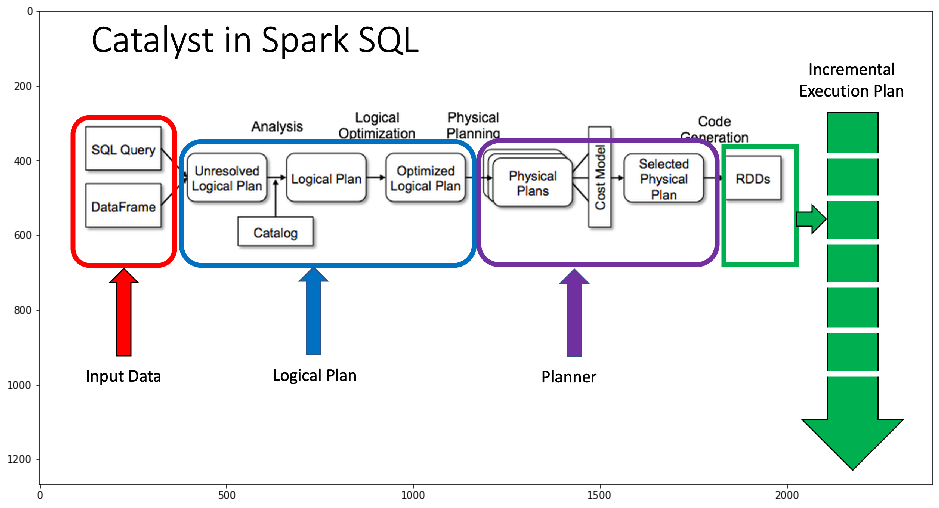

In [19]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'Catalyst in Spark SQL2.png')
plt.imshow(image);

print('Image source -> ')

### Structured Streaming:

The above only decribes the components of the Spark SQL Enginer Catalyst Optimiser (logical plan, physical plan and code generation). Structured streaming here introduces the __incremental execution plan__, where it repeatedly applies the execution plan for every new block of data received. This means that the engine takes advantage of the optimisations of Spark DataFrames and applies it to the incoming data stream. It also means it is easier to integrate other DataFrame optimised components such as MLlib, GraphFrames, TensorFrames etc.


## 6.2 Continuous Aggregations with Structured Streaming:





## 6.2.1 For Terminal 1 -> Netcat Window:

Image source -> 


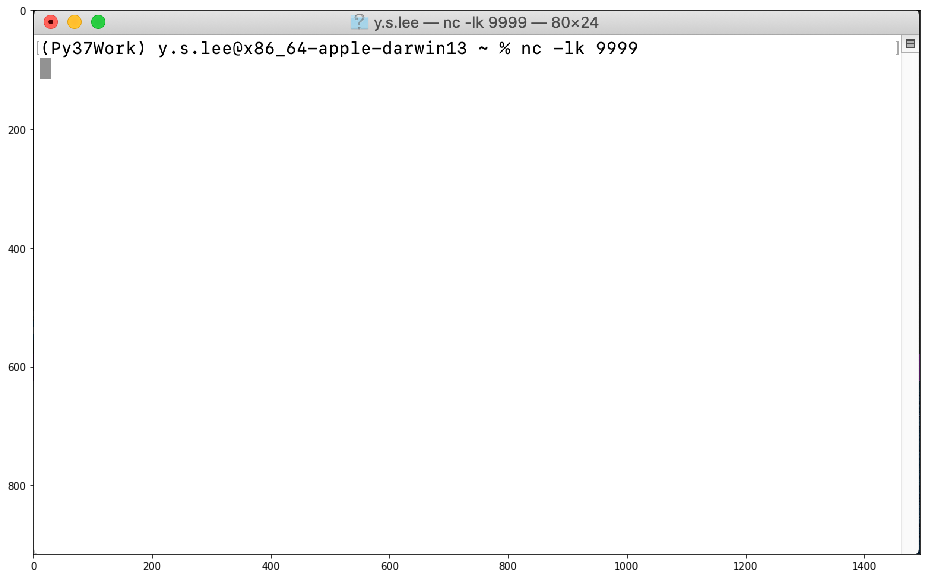

In [20]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'structuredStreaming_Netcat1.png')
plt.imshow(image);

print('Image source -> ')

Next, will be to type in the events that are desired, where it can be seen in the following diagram.

Image source -> 


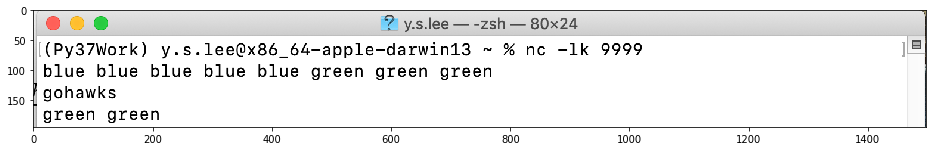

In [21]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'structuredStreaming_Netcat2.png')
plt.imshow(image);

print('Image source -> ')

## 6.2.2 For Terminal 2 -> Spark Streaming Window:

Create a PySpark Streaming application that aggregates the number of words (events above). The code is constructed in a " .py " file which can be created in PyCharm or other IDE and call it: structured_streaming_word_count.py

The following describes the inner workings:
- First, create the Spark Context to only use 2 CPU threads for processing. By setting local[2].
- Create a checkpoint for the Local Streaming Context.

Image source -> 


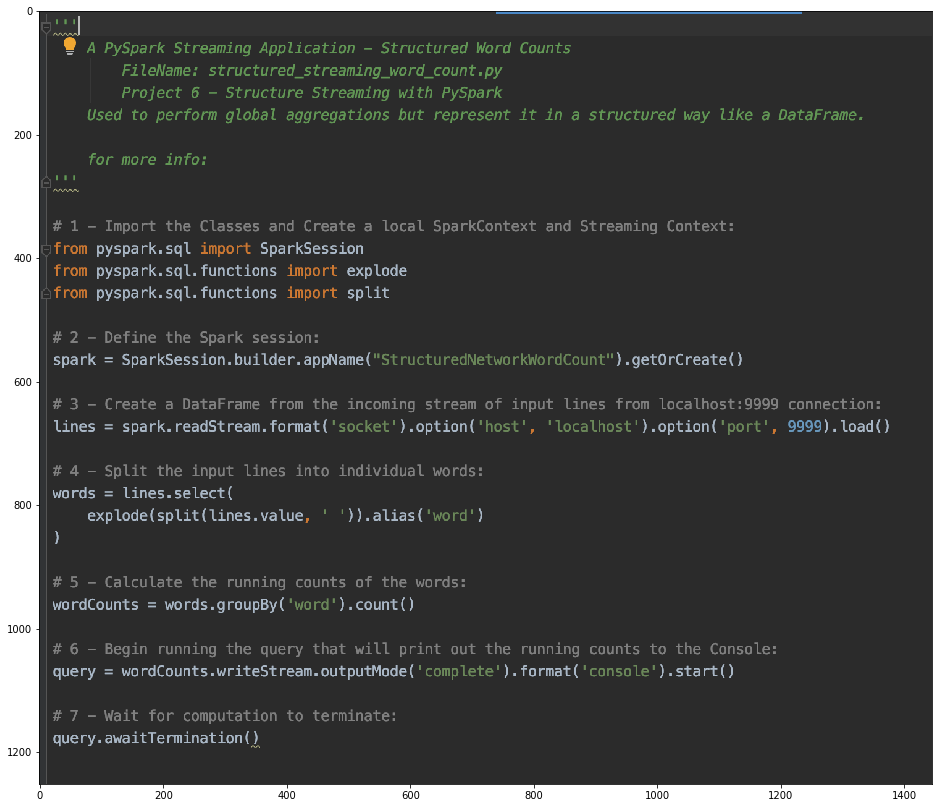

In [22]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 15))
image = mpimg.imread(image_path + 'structured_streaming_word_count_pyFile.png')
plt.imshow(image);

print('Image source -> ')

## 6.2.3 Putting all together:

#### To run Netcat Window and Spark Streaming Window in the following sequence:
1. In TERMINAL 1, Start with NetCat Window -> in terminal, type in: nc -lk 9999
2. In TERMINAL 2, Start the PySpark Streaming App where in terminal, type in: 
    - First navigate to the location of the $SPARK_HOME directory -> cd /opt/spark/bin/
    - This will bring you to your spark directory in the "bin" folder, where the "spark-submit" file is located.
    - Then second to execute the .py file -> spark-submit /your_working_directory/structured_streaming_word_count.py localhost 9999
    - Where "/your_working_directory/" is the working directory where the 'structured_streaming_word_count.py" file is located.
3. It can be seen in Terminal 2 that there are timestamps appearing, where each interval is 1 second.
4. Proceed to type in Terminal 1, where for the 1st second, type in "blue blue blue blue blue green green green". For the 2nd second, type in "gohawks". Wait a second. Finally for the 4th second, type in "green green"

### Running errors with Spark-Submit:

This may require a change in the .zshrc file or .bash_profile file. Where previously this "export PYSPARK_DRIVER_PYTHON=jupyter" was the original setting so that PySpark would run in Jupyter Notebooks, but there is a requirement to change it to "export PYSPARK_DRIVER_PYTHON=python" (set as python) to run "spark-submit".

The above fixes are taken from: 
- MAYBE -> https://stackoverflow.com/questions/46507887/pyspark-error-executing-jupyter-command-while-running-a-file-using-spark-submit
- WORKED -> https://stackoverflow.com/questions/54797832/why-does-spark-submit-fail-with-error-executing-jupyter-command

#### Below shows the Terminal 2 input:

Image source -> 


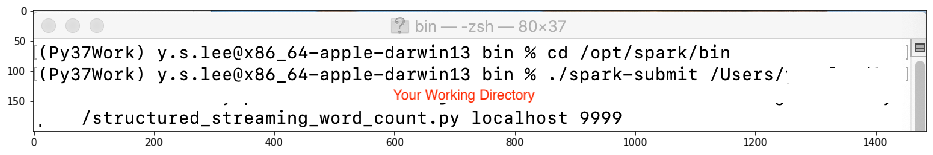

In [23]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'structured_streamingConsoleInput.png')
plt.imshow(image);

print('Image source -> ')

#### Below is a diagram that shows the console Output from the PySpark Streaming application:

Image source -> 


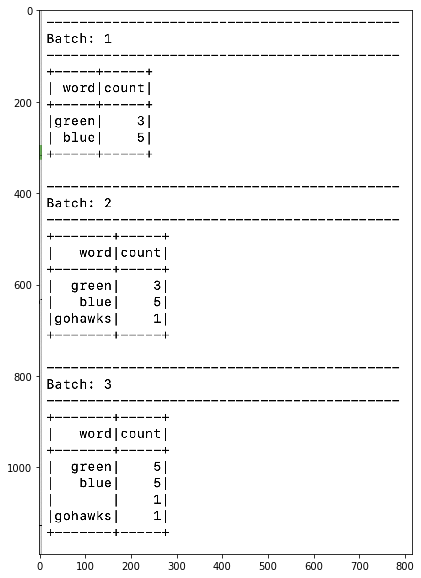

In [24]:
%%local

# plot the image
fig, ax1 = plt.subplots(figsize=(16, 10))
image = mpimg.imread(image_path + 'structured_streamingConsoleOutput.png')
plt.imshow(image);

print('Image source -> ')

### To end, simly use (Ctrl+C) to terminate the processes. 

### Observation:

It can be noticed that with structured streaming, the streaming aggregations only appears once a new event has occured. More specifically, there was time delays when there aren't any extra batches being reported to the console. This is an optimisation within the engine. 


### And Don't forget to change "export PYSPARK_DRIVER_PYTHON=python" back into "export PYSPARK_DRIVER_PYTHON=jupyter" to keep on using Jupyter for PySpark.

## Summary:

From this project, I was able to gain a better understanding (although not every aspects with 100% certainty) of Spark Structured Streaming. I was to learn about the Spark SQL Engine Catalyst Optimiser and its 4 main components such as Analysis, Logical Optimisation, Physical Planning and Code generation. I have also learnt the basics of developing a continuous application with batch or real-time processing. These were conducted in two terminal windows whereby using Netcat Window and a Spark streaming window respectively. For the streaming window, I was able to create .py scripts/files to intake, process and output the incoming streamed data to be outputted as DStreams (batched processes), Global Aggregations (sum of events in a time window) and Structured Streaming (Incremental Execution plan).